# Quantinuum Hardware Quantum Volume Test Data 

This notebook contains an overview of loading and viewing Quantum Volume Test (QVT) data for Quantinuum H-Series hardware.

## Loading QVT Data
Each QV data file is saved as a dictionary in a json file with five keys:
- `qv_circs_nomeas`: list of qasm for each qv circuit without optimization and no final measurement
- `qv_circs`: list of qasm for each qv circuit in same order as `qv_circs_nomeas`
- `raw_results`: list of outputs from each shot of each qv circuit in same order as `qv_circs_nomeas`
- `heavy_outputs`: frequency of observed heavy output counts for each circuit in same order as `qv_circs_nomeas` 
- `heavy_ideal`: probability of heavy output without errors in same order as `qv_circs_nomeas`

Available datasets:
- `'n6_H0_raw_results.json'`: QV 64 passed on 06/20/2020
- `'n7_H1-1_raw_results.json'`: QV 128 passed on 09/29/2020
- `'n9_H1-1_raw_results.json'`: QV 512 passed on 03/02/2021
- `'n10_H1-1_raw_results.json'`: QV 1,024 passed on 07/12/2021
- `'n11_H1-2_raw_results.json'`: QV 2,048 passed on 12/17/2021
- `'n12_H1-2_raw_results.json'`: QV 4,096 passed on 04/11/2022
- `'n13_H1-1_raw_results.json'`: QV 8,192 passed on 09/20/2022
- `'n14_H1-1_raw_results.json'`: QV 16,384 passed on 01/11/2023
- `'n15_H1-1_raw_results.json'`: QV 32,768 passed on 01/18/2023
- `'n16_H1-1_raw_results.json'`: QV 65,536 passed on 03/17/2023
- `'n16_H1-2_raw_results.json'`: QV 65,536 passed on 04/18/2023

In [11]:
import pathlib
import json

nqubits = 16
machine = 'H1-1'

file_name = f'n{nqubits}_{machine}_raw_results.json'
data_dir = pathlib.Path.cwd().parent.joinpath('data')

with open(data_dir.joinpath(file_name), 'r') as f:
    data = json.load(f)

We can also load each pickle file and directly convert to a Qiskit `QVFitter` object.

In [12]:
from qtm_qv.loading_functions import load_fitter

qv_fitter = load_fitter(machine, nqubits)
print(f'Measured HOP = {qv_fitter.ydata[0][0]}')

Measured HOP = 0.67965


## Count the number of gates

In [13]:
from qtm_qv.utils import gate_counts
import numpy as np

counts_nomeas = gate_counts(data['qv_circs_nomeas'])
counts = gate_counts(data['qv_circs'])

print(f'TQ gates (no optimization) = {np.mean(counts_nomeas["cx"])}')
print(f'TQ gates (w/ optimization) = {np.mean(counts["rzz"])}')  # replace "rzz" with "cx" for n < 13

TQ gates (no optimization) = 384.0
TQ gates (w/ optimization) = 297.29


## Plot Circuit Index vs. Heavy Output Frequency

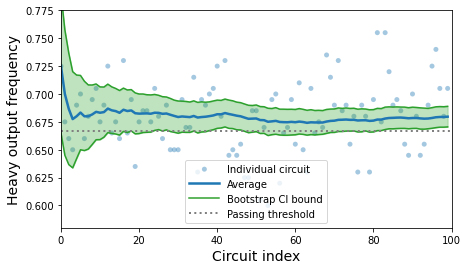

In [14]:
from qtm_qv.plotting_functions import success_v_time

success_v_time(
    qv_fitter, 
    nqubits, 
    original_ci=False,
    bootstrap_ci=True,
    fill_range=True
)

<div align="center"> &copy; 2023 by Quantinuum. All Rights Reserved. </div>